This work is for the NEURL-GA 3042 Computational Neuroscience course taught by Professor Xiao-jing Wang in Fall 2022. 

### Question 1a

The delta function defined here is Dirac delta function in a loose thought perspective. It is constrained to satisfy the identity: 

\begin{equation*}
    \int_{-\infty}^{\infty} \delta(x)dx = 1
\end{equation*}

Suppose $x(0)=x_0$, then solving this stochastic differential equation (SDE), namely 1D diffusion equation, we have: 

\begin{equation*}
    x(t) = x_0 + \int_0^t \sigma \omega(s)ds
\end{equation*}
Thus, $\langle x(t) \rangle = \langle x_0 \rangle + \sigma \int_0^t \langle \omega(s) \rangle ds = x_0$ since the initial condition is given as a constant and $\omega(t)$ is defined as white noise with mean value of $0$. 

For the second part, $(x-x_0)^2 = \sigma^2 \int_0^t \omega^2(s) ds$. Following the fashion in statistics, we denote $I = \int_0^t \omega(s)ds$, and we need to calculate the expectation value of $I^2$. 

\begin{equation*}
\begin{aligned}

\langle I^2 \rangle = \langle \int_0^t \omega(s)ds \int_0^t \omega(u)du \rangle = \int_0^t \int_0^t \langle \omega(s)\omega(u) \rangle dsdu
= \int_0^t \int_0^t \delta (s-u) dsdu

\end{aligned}
\end{equation*}

Also:

\begin{equation*}

\int_0^t \delta(s-a) ds = 1_{[0,t]}(a)

\end{equation*}

so:

\begin{equation*}

\int_0^t \int_0^t \delta (s-u) dsdu = \int_0^t 1_{[0,t]} (u)du = t

\end{equation*}

Thus, $\langle (x-x_0)^2 \rangle = \sigma^2 t$. 


### Question 1b

Here the problem is simplified to $\dfrac{dx}{dt} = \omega(t)$ where $\omega(t)$ is sampled from normal distribution independently at different timestamp $t$. Also, we use forward Euler method by $x_{(n+1)} = x_n + \sigma \cdot \sqrt{dt} \cdot \omega_n$. 

Text(0.5, 1.0, 'Compare simulation result and analytical expression')

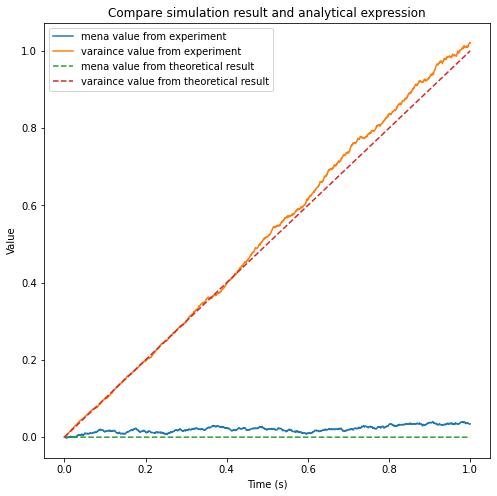

In [27]:
from cProfile import label
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# define parameters
x0 = 0
dt = 0.5 * 0.001 # s 
T = 1 # s
mu, sigma = 0.0, 1.0
totaltrails = 1000 # number of total trails
all_res = [] # save of all result for tt independent trails
binn = 15 # parameter in plotting histogram
res = []

# main calculation
timestampcoll = np.arange(0,T + dt, dt)
for seed in range(totaltrails):
    np.random.seed(seed)
    xx = np.zeros(int((T-0)/dt+1))
    xx[0] = x0 # set initial value 
    cnt = 0
    for t in timestampcoll:
        rr = np.random.normal(mu,sigma) # sampled from normal distribution
        xx[cnt] = xx[cnt - 1] + sigma * math.sqrt(dt) * rr
        cnt += 1
    res.append(xx)

# change it to nparray for simplicity in further calculation
res = np.array(res)

mean_set = np.mean(res, axis = 0) # numerical result mean
vari_set = np.var(res, axis = 0) # numerical result variance
thre_mean_set = [0 for i in range(len(timestampcoll))] # theoretical result mean
thre_vari_set = [timestampcoll[i] for i in range(len(timestampcoll))] # theoretical result variance, when sigma = 1

# plot result compare with the theoretical result
plt.figure(figsize=(8,8))
plt.plot(timestampcoll,mean_set,label='mena value from experiment')
plt.plot(timestampcoll,vari_set,label='varaince value from experiment')
plt.plot(timestampcoll,thre_mean_set,'--',label='mena value from theoretical result')
plt.plot(timestampcoll,thre_vari_set,'--',label='varaince value from theoretical result')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Compare simulation result and analytical expression')

We could notice that the numerical simulation results and the analytical expression results are very similar, and the discrepancy is expected to be smaller if we repeated the independent trails for more times, say 10000.  

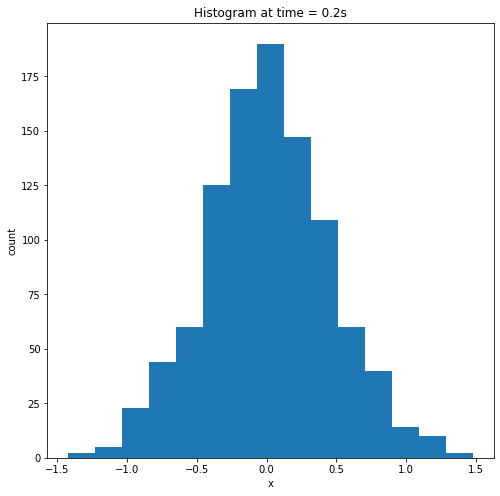

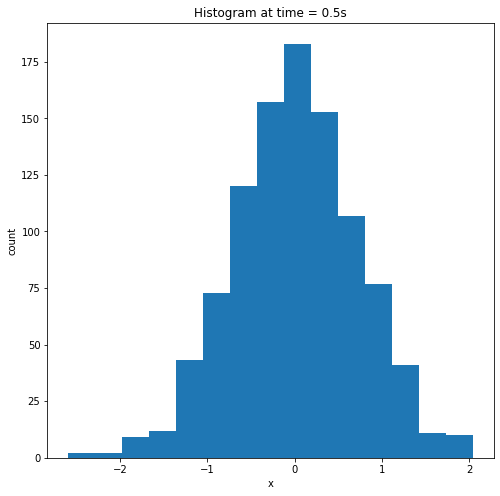

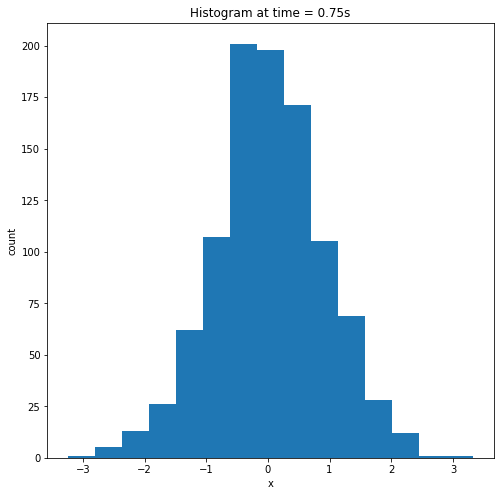

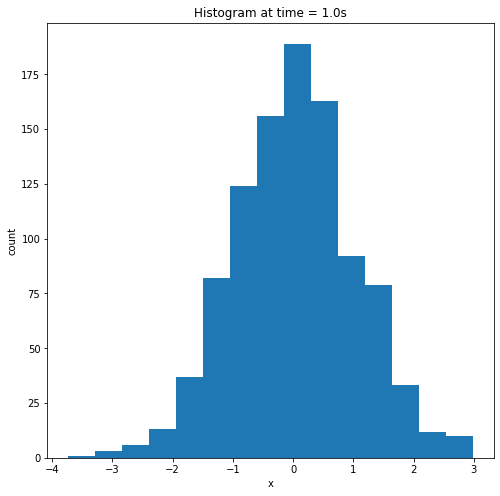

In [28]:
# Save the histograms of x values over the 1000 trials at t = 0.2, 0.5, 0.75, 1 s.

timesc = [0.2,0.5,0.75,1.0]
simresulttime = []
for ttt in timesc:
    indd = ttt/dt
    data = res[:,int(indd)]
    plt.figure(figsize=(8,8))
    plt.hist(data, binn)
    plt.xlabel('x')
    plt.ylabel('count')
    plt.title(f'Histogram at time = {ttt}s')


## Question 2a

This approach is inspired and referenced to Evans book Partial Differential Equation and Stein's Fourier Analysis. 

This equation could be solved using the paradigm of 1D diffusion equation. That is, we should solve:

\begin{equation*}
    \dfrac{\partial p}{\partial t} = D \dfrac{\partial^2 p}{\partial x^2}
\end{equation*}

We take boundary conditions are at infinity, as $p(x,t) \rightarrow 0, x \rightarrow \pm \infty$. As specified, we also take delta function as initial condition: $p(x,0) = \delta(x-x_0)$. Taking Fourier transform of it: 

\begin{equation*}
    p(x,t) = \int_{-\infty}^{\infty} \dfrac{1}{2\pi} e^{ik(x-x_0)} p_k(t) dk
\end{equation*}

Also, its inverse transform is: 

\begin{equation*}

p_k(t) = \int_{-\infty}^{\infty} e^{ik(x-x_0)} p(x,t) dx

\end{equation*}

So after taking the transform, we have the initial condition of: 

\begin{equation*}
    p_k(0) = 1
\end{equation*}

Following, we could substitute $p(x,t)$ into the diffusion equation and generate: 

\begin{equation*}
    \int_{-\infty}^{\infty} \dfrac{1}{2\pi} (\dot p_k(t) + Dk^2 p_k(t)) e^{ik(x-x_0)} dk = 0
\end{equation*}

\begin{equation*}
    \dot p_k(t) + Dk^2 p_k(t) = 0
\end{equation*}

which gives the solution of $p_k(t) = p_K(0)e^{-Dk^2 t} = e^{-Dk^2}t$. Thus, we have: 

\begin{equation*}
    p(x,t) = \int_{-\infty}^{\infty} \dfrac{1}{2\pi} e^{ik(x-x_0)}e^{-Dk^2 t} dk

\end{equation*}

Since the $k$ integral is a Gaussian, we could refer to $\int_{\infty}^{\infty} e^{-y^2}dy = \sqrt{\pi}$ and get: 

\begin{equation*}
    p(x,t) = \dfrac{1}{\sqrt{4\pi D t}} e^{-\frac{(x-x_0)^2}{4Dt}} = \dfrac{1}{\sqrt{2\pi t} \sigma} e^{-\frac{(x-x_0)^2}{2\sigma^2 t}}
\end{equation*}

which is what expected. 



Another approach, probably simpler and more direct in this context, is to calculate the partial derivative of the given $p(x,t)$ mentioned in Equation 3 and plug into Equation (2) to see whether the equation still holds. Hence: 

\begin{equation*}
    \dfrac{\partial }{\partial t}(p(x,t)) = \dfrac{-t\sigma^2+(x-x_0)^2}{2^{3/2}\pi^{1/2}t^{5/2}\sigma^3} e^{-\frac{(x-x_0)^2}{2t\sigma^2}}
\end{equation*}

\begin{equation*}
    \dfrac{\partial}{\partial x}(p(x,t)) = -\dfrac{(x-x_0)}{2^{1/2}\pi^{1/2}t^{3/2}\sigma^3} e^{-\frac{(x-x_0)^2}{2t\sigma^2}}
\end{equation*}

\begin{equation*}
    \dfrac{\partial }{\partial x} (\dfrac{\partial}{\partial x} p(x,t)) = \dfrac{-t\sigma^2+(x-x_0)^2}{2^{3/2}\pi^{1/2}t^{5/2}\sigma^3} e^{-\frac{(x-x_0)^2}{2t\sigma^2}}
\end{equation*}

Thus, we would get the desired equality that: 

\begin{equation*}
    \dfrac{\partial p(x,t)}{\partial t} = \dfrac{\sigma^2}{2} \dfrac{\partial^2 p(x,t)}{\partial x^2}
\end{equation*}

meaning that $p(x,t)$ satisfies the Fokker-Planck equation and it is our desired solution. 



## Question 2b

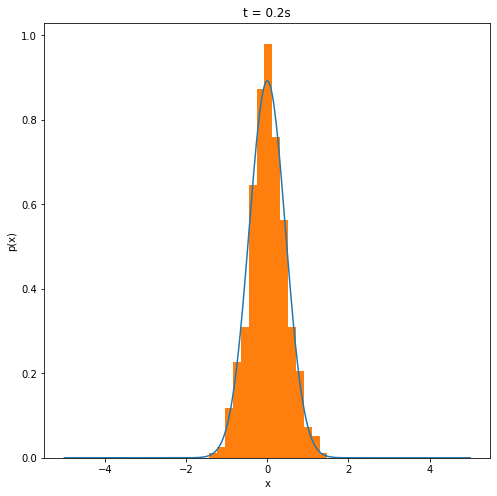

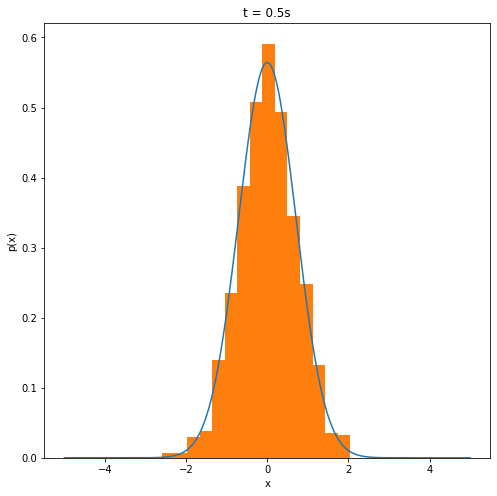

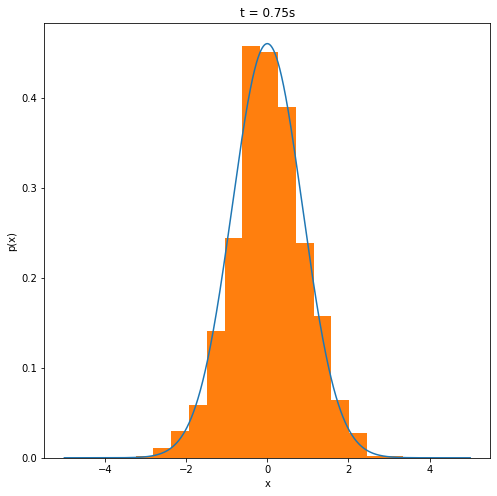

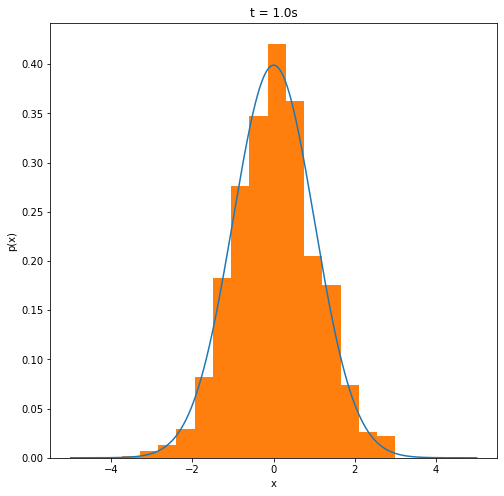

In [29]:
from os import times


def pfunc(x,t):
    sigma = 1
    x0 = 0
    pxt = 1/(math.sqrt(2*math.pi*t)*sigma) * math.exp(-(x-x0)**2/(2*sigma**2*t))
    return pxt

xxx = np.arange(-5,5,0.001)
res2 = []
for t in timesc:
    nn = []
    for valx in xxx:
        nn.append(pfunc(valx,t))
    res2.append(nn)

for i in range(len(timesc)):
    plt.figure(figsize=(8,8))
    plt.plot(xxx,res2[i])
    ttt = timesc[i]
    ind = ttt/dt
    data = res[:,int(ind)]
    plt.hist(data, binn, density=True)
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.title(f't = {ttt}s')
    plt.show()


Notice that when time $t$ is larger, the normalized histograms are more scattered, meaning the level of variance increases but the mean value roughly stays constant. 